#### Knapsack
T(n) = O(nB), where B is the capacity

In [1]:
def solve_knapsack(profits, weights, capacity):
    n = len(profits)
    B = capacity
    T = [[0 for _ in range(B+1)] for _ in range(n)]

    # recurrence
    #                          profit[i] + row above - w[i] , row above)
    # max profit T(i, b) = max(p[i] + T(i-1, b-w[i]), T(i-1, b)),
    for i in range(n):
        for b in range(B+1):
            if weights[i] <= b:
                T[i][b] = max(profits[i] + T[i-1][b-weights[i]], T[i-1][b])
            else:
                T[i][b] = T[i-1][b]

    # return T[n-1][B-1] == capacity
    return T[n-1][B]

profits = [1, 6, 10, 16]
weights = [1, 2, 3, 5]
print(solve_knapsack(profits, weights, 5))
print(solve_knapsack(profits, weights, 6))
print(solve_knapsack(profits, weights, 7))

16
17
22


#### Longest Common Subsequence

$T(n) = O(n\cdot m)$ if the strings have unequal length

$T(n) = O(n^2)$ if the strings are of equal length

In [2]:
# https://leetcode.com/problems/longest-common-subsequence/
def longest_common_subsequence(text1: str, text2: str) -> int:
    if len(text1) == 0 or len(text2) == 0:
        return 0

    table = [[0 for _ in range(len(text2)+1)] for _ in range(len(text1)+1)]
    for i in range(len(text1)):
        for j in range(len(text2)):
            if text1[i] == text2[j]:
                table[i][j] = 1 + table[i-1][j-1]
            else:
                table[i][j] = max(table[i-1][j], table[i][j-1])
    max_val = 0
    for row in table:
        max_val = max(max(row), max_val)
    return max_val

longest_common_subsequence(['a', 'b', 'c', 'd', 'e'],
                           ['a', 'e', 'c', 'd', 'e'])

4

### Nth Fibonacci Number

In [13]:
def fib(n):
    a = 0
    b = 1
    for _ in range(n):
        a, b = b, a + b
    return a

def fib_verbose(n):
    a = 0
    b = 1
    for _ in range(n):
        tmp = a
        a = b
        b = tmp + b
    return a

for i in range(10):
    a = fib(i)
    b = fib_verbose(i)
    assert a == b
    print(f"fib({i})={fib(i)}")


fib(0)=0
fib(1)=1
fib(2)=1
fib(3)=2
fib(4)=3
fib(5)=5
fib(6)=8
fib(7)=13
fib(8)=21
fib(9)=34


### Longest Increasing Subsequence
$T(n) = O(n^2)$

In [2]:
from typing import List

# https://leetcode.com/problems/longest-increasing-subsequence/submissions/
class Solution:
    def lengthOfLIS(self, nums: List[int]) -> int:
        if len(nums) == 0:
            return 0

        # array containing the length of the LIS up to each element
        arr = [0 for _ in nums]

        for i, x in enumerate(nums):
            # holds the maximum LIS up to and including x
            m = 0
            for j in range(0, i):
                # check if current x is greater than each previous element,
                # starting at the first element in the array.
                # also check if the max length of the LIS up to each
                # preceding element is at least m
                # if x > nums[j] and arr[j] >= m:
                if x > nums[j] and arr[j] >= m:
                    m = arr[j]

            arr[i] = m + 1
        return max(arr)

Solution().lengthOfLIS([1,2,3,4,7,5,9,6])



6

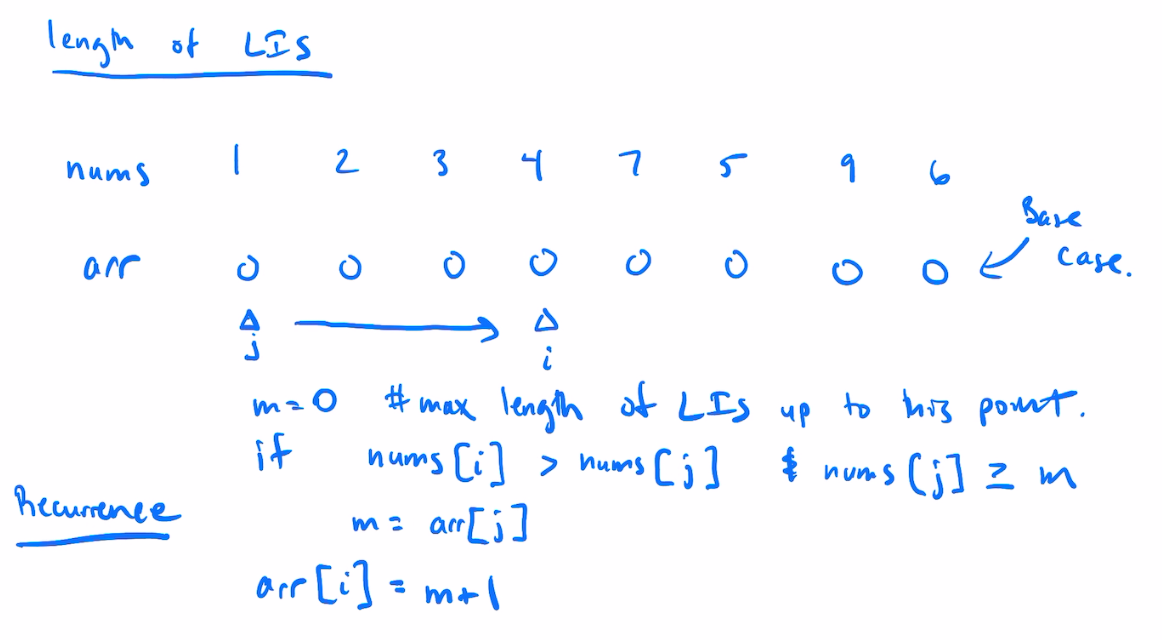

In [3]:
from IPython import display
display.Image("media/longest_increasing_subsequence.png")


[1937] Maximum Number of Points with Cost

https://leetcode.com/problems/maximum-number-of-points-with-cost/

Brute force solution

base_case:


* $max\_sum[i,j] = 0$ where 0 < i < n and 0 < j < m

recurrence:
* $ max\_sum[i,j] = max(max\_sum[i,j], max\_sum[i-1,k] + points[i,j] - abs(k-j))$

for all k where k is between 0 and m
and 0 < i < n and 0 < j < m

* Time complexity: O(nm^2) since we iterate over the entire table once and over m twice
* Space complexity: O(nm) for the table

Faster solution
https://leetcode.com/problems/maximum-number-of-points-with-cost/discuss/1567183/Python3%3A-Easy-DP-method-with-thorough-explanation

